## Import Library

In [1]:
import tensorflow as tf
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Image Augmentation and Normalization Function

In [2]:
def train_val_generators(training_dir, validation_dir):
  train_datagen = ImageDataGenerator(
      rescale=1/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
  )

  train_generator = train_datagen.flow_from_directory(
      directory=train_dir,
      batch_size=20,
      class_mode='categorical',
      target_size=(150, 150)
  )

  val_datagen = ImageDataGenerator(rescale=1/255)

  val_generator = val_datagen.flow_from_directory(
      directory=val_dir,
      batch_size=2,
      class_mode='categorical',
      target_size=(150, 150)
  )

  return train_generator, val_generator

## Specify The Train and Validation Directories and Map into Generator Function

In [3]:
train_dir = 'dataset/train/'
val_dir = 'dataset/validation/'
train_generator, validation_generator = train_val_generators(train_dir, val_dir)

Found 2477 images belonging to 22 classes.
Found 102 images belonging to 22 classes.


## Check The Label of 22 Classes

In [4]:
train_generator.class_indices

{'anggur': 0,
 'apel': 1,
 'ayam': 2,
 'brokoli': 3,
 'cap cay': 4,
 'ikan': 5,
 'jamur crispy': 6,
 'kentang': 7,
 'mie': 8,
 'nasi': 9,
 'nasi goreng': 10,
 'pempek kapal selam': 11,
 'pisang goreng': 12,
 'rawon': 13,
 'rendang': 14,
 'roti': 15,
 'sate ayam': 16,
 'sate usus': 17,
 'sosis': 18,
 'soto ayam': 19,
 'telur mata sapi': 20,
 'wortel': 21}

In [5]:
validation_generator.class_indices

{'anggur': 0,
 'apel': 1,
 'ayam': 2,
 'brokoli': 3,
 'cap cay': 4,
 'ikan': 5,
 'jamur crispy': 6,
 'kentang': 7,
 'mie': 8,
 'nasi': 9,
 'nasi goreng': 10,
 'pempek kapal selam': 11,
 'pisang goreng': 12,
 'rawon': 13,
 'rendang': 14,
 'roti': 15,
 'sate ayam': 16,
 'sate usus': 17,
 'sosis': 18,
 'soto ayam': 19,
 'telur mata sapi': 20,
 'wortel': 21}

## Transfer Learning: InceptionV3

#### Load Pretrained Weights to Keras InceptionV3

In [11]:
# Import model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Set the weights file
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pretrained_model = InceptionV3(input_shape=(150,150,3),
                               include_top = False,
                               weights = None)

# Load the pre-trained weights
pretrained_model.load_weights(local_weights_file)

# Freeze the weights of the layers
for layer in pretrained_model.layers:
  layer.trainable = False

In [12]:
# Choose 'mixed_7' as the last layer of base model
last_layer = pretrained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


#### Define The Layers

In [13]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)

# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(22, activation='softmax')(x)

# Append the dense network to the base model
model = tf.keras.Model(pretrained_model.input, outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 74, 74, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                            

## Train The Model

In [ ]:
from tensorflow.keras.optimizers import RMSprop, Adam

optimizer1 = RMSprop(learning_rate=1e-5)
optimizer2 = RMSprop(learning_rate=1e-4)
optimizer3 = Adam(learning_rate=1e-5)


In [11]:
model.compile(
    optimizer=optimizer2,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator,
    verbose = 1,
)

Epoch 1/100
124/124 [==============================] - 63s 485ms/step - loss: 1.9497 - accuracy: 0.4501 - val_loss: 0.9996 - val_accuracy: 0.6961
Epoch 2/100
124/124 [==============================] - 71s 574ms/step - loss: 1.0973 - accuracy: 0.6746 - val_loss: 0.6198 - val_accuracy: 0.8039
Epoch 3/100
124/124 [==============================] - 70s 567ms/step - loss: 0.8372 - accuracy: 0.7481 - val_loss: 0.4999 - val_accuracy: 0.8725
Epoch 4/100
124/124 [==============================] - 71s 573ms/step - loss: 0.7201 - accuracy: 0.7735 - val_loss: 0.4449 - val_accuracy: 0.8529
Epoch 5/100
124/124 [==============================] - 75s 601ms/step - loss: 0.6500 - accuracy: 0.7994 - val_loss: 0.4162 - val_accuracy: 0.8627
Epoch 6/100
124/124 [==============================] - 73s 586ms/step - loss: 0.5919 - accuracy: 0.8135 - val_loss: 0.3641 - val_accuracy: 0.8824
Epoch 7/100
124/124 [==============================] - 79s 637ms/step - loss: 0.5353 - accuracy: 0.8325 - val_loss: 0.3780 -

# Plot Accuracy and Loss

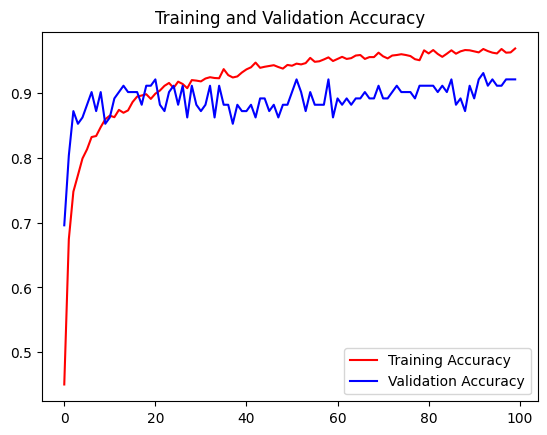

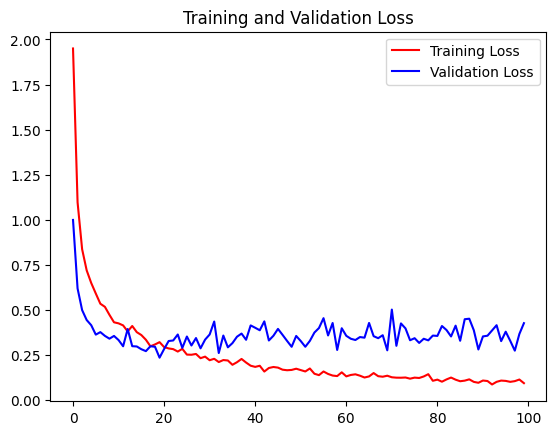

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

# Accuracy
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

# Loss
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

## Convert The Model into .tflite

In [13]:
export_dir = 'saved_model/rms1e-4_improved'

tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/rms1e-4_improved\assets


INFO:tensorflow:Assets written to: saved_model/rms1e-4_improved\assets


In [14]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('v2rmsprop1e-4_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [15]:
# Convert model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = "v2rmsprop1e-4_model_compressed.tflite"

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

## Evaluate The Model

In [16]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from tensorflow.keras.utils import load_img, img_to_array


labels = ['Anggur', 'Apel', 'Ayam Goreng', 'Brokoli', 'Cap Cay', 'Ikan Bakar', 'Jamur Crispy', 'Kentang', 'Mie Goreng', 'Nasi Putih', 'Nasi Goreng', 'Pempek Kapal Selam', 'Pisang Goreng', 'Rawon', 'Rendang', 'Roti', 'Sate Ayam', 'Sate Usus', 'Sosis', 'Soto Ayam', 'Telur Mata Sapi', 'Wortel']

# predicting images
path = 'test_images/WhatsApp Image 2023-06-12 at 10.09.46 PM.jpeg'
img = load_img(path, target_size=(150, 150))
x=img_to_array(img)
x /= 255
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)
result = np.argmax(classes)
print(classes[0])
print(f'\nlabels[{result}] = {classes[0,result]}')
print(labels[result])

1/1 [==============================] - 1s 1s/step
[2.4704394e-15 2.8892379e-16 1.5348204e-15 8.0402194e-17 5.5467523e-12
 1.9312893e-15 1.7122756e-14 1.5169076e-11 1.2595401e-05 2.0467755e-04
 5.8941698e-08 1.2899134e-09 9.8832253e-10 1.8412429e-12 2.0653634e-10
 1.8361822e-12 7.3976263e-16 2.4073182e-15 1.1512816e-17 3.1414743e-10
 9.9978262e-01 1.2965810e-16]

labels[20] = 0.9997826218605042
Telur Mata Sapi
